<a href="https://colab.research.google.com/github/DwijBishnoi/DwijBishnoi.github.io/blob/main/HKEX%20%5B%20Hongkong%20Stock%20Exchange%5D/HSI_XML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-c30efe3c131e>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill')


Epoch 1/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 503823840.0000 - mae: 22017.5859 - val_loss: 268728896.0000 - val_mae: 15595.6670
Epoch 2/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 141708944.0000 - mae: 10661.9434 - val_loss: 45323092.0000 - val_mae: 6028.9668
Epoch 3/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 32747964.0000 - mae: 4960.2573 - val_loss: 9620518.0000 - val_mae: 2550.2983
Epoch 4/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7472196.5000 - mae: 2135.4753 - val_loss: 2856681.2500 - val_mae: 1269.5293
Epoch 5/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2772288.5000 - mae: 1136.0599 - val_loss: 1212387.1250 - val_mae: 769.6707
Epoch 6/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1323479.7500 - mae: 726.4702 - val_loss: 685064.3125 - val_mae: 587.6795
Epoch 7/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 628261.0000 - mae: 525.3521 - val_loss: 438163.4062 - val_mae: 457.3760
Epoch 8/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0332
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 9.2878e-04
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 8.8729e-04
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 8.1170e-04
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 6.8221e-04
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 6.4156e-04
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 5.7539e-04
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 5.4670e-04
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 5.2838e-04
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 5.0358e-04
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 5.0119e-04
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 4.5142e-04
Epoch 13/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 4.0355e-04
Epoch 14/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 3.5253e-0

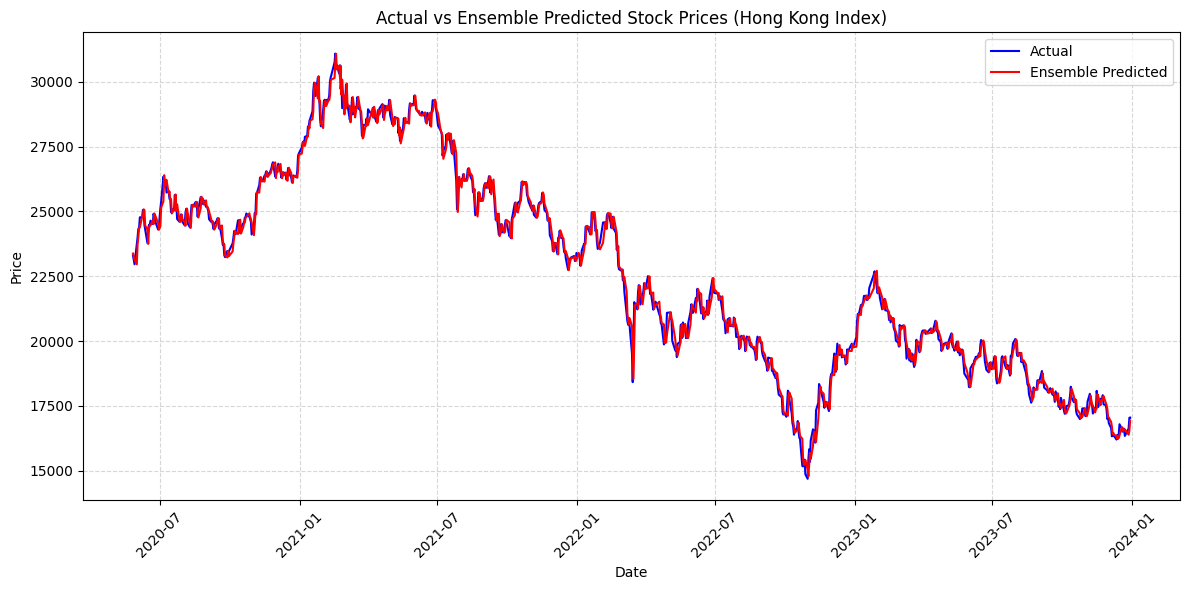

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from xgboost import XGBRegressor
import tensorflow as tf
from keras.layers import LSTM, Dense

# Fetch historical stock prices forHong Kong Index from Yahoo Finance
data = yf.download('^HSI', start='2004-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].fillna(method='ffill')

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X1 = data[features]
y1 = data[target]

# Split data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize features
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# Initialize and train XGBoost model
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
model.fit(X1_train_scaled, y1_train)

# Make predictions
XGB_predictions = model.predict(X1_test_scaled)

# Build MLP model with increased complexity
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X1_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with Adam optimizer and MSE as the loss function
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model2.fit(X1_train_scaled, y1_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions
MLP_predictions = model.predict(X1_test_scaled)

# Feature Scaling
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler2.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Convert data into sequences
def create_sequences(data, seq_length):
    X3, y3 = [], []
    for i in range(len(data) - seq_length):
        X3.append(data[i:i+seq_length])
        y3.append(data[i+seq_length])
    return np.array(X3), np.array(y3)

seq_length = 60  # Sequence length
X3_train, y3_train = create_sequences(train_data, seq_length)
X3_test, y3_test = create_sequences(test_data, seq_length)

# Reshape input data for LSTM
X3_train = X3_train.reshape((X3_train.shape[0], X3_train.shape[1], 1))
X3_test = X3_test.reshape((X3_test.shape[0], X3_test.shape[1], 1))

# Build LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, return_sequences=True, input_shape=(X3_train.shape[1], 1)))
model3.add(LSTM(units=50))
model3.add(Dense(units=1))
model3.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model3.fit(X3_train, y3_train, epochs=50, batch_size=32)

# Predictions
LSTM_predictions = model3.predict(X3_test)

# Inverse scaling
LSTM_predictions = scaler2.inverse_transform(LSTM_predictions)
y3_test = scaler2.inverse_transform(y3_test)
i = 10000
# Interpolate predictions to align them
xgb_interp = interp1d(np.arange(len(XGB_predictions)), XGB_predictions, kind='nearest')
mlp_interp = interp1d(np.arange(len(MLP_predictions)), MLP_predictions.flatten(), kind='nearest')
lstm_interp = interp1d(np.arange(len(LSTM_predictions)), LSTM_predictions.flatten(), kind='nearest')

# Calculate the length of the shortest array
min_length = min(len(XGB_predictions), len(MLP_predictions), len(LSTM_predictions))

# Create ensemble features by concatenating interpolated predictions
ensemble_features = np.column_stack((xgb_interp(np.linspace(0, len(XGB_predictions) - 1, min_length)),
                                     mlp_interp(np.linspace(0, len(MLP_predictions) - 1, min_length)),
                                     lstm_interp(np.linspace(0, len(LSTM_predictions) - 1, min_length))))

# Train a linear regression model
ensemble_model = LinearRegression()
ensemble_model.fit(ensemble_features, y3_test[:min_length])

# Predict using the ensemble model
ensemble_predictions = ensemble_model.predict(ensemble_features)

# Calculate Mean Squared Error for ensemble predictions
ensemble_mse = mean_squared_error(y3_test[:min_length], ensemble_predictions)
print('Ensemble Mean Squared Error:', ensemble_mse/i)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are your actual and predicted values respectively

# Mean Absolute Error
ensemble_mae = mean_absolute_error(y3_test, ensemble_predictions)
print(' Ensemble Mean Absolute Error:', ensemble_mae/i)

# Root Mean Squared Error
ensemble_rmse = np.sqrt(mean_squared_error(y3_test, ensemble_predictions))
print('Ensemble Root Mean Squared Error:', ensemble_rmse/i)

# R-squared
ensemble_r_squared = r2_score(y3_test, ensemble_predictions)
print('Ensemble R-squared:', ensemble_r_squared)

# Plotting actual vs ensemble predicted
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+seq_length:train_size+seq_length+min_length], y3_test[:min_length], label='Actual', color='blue')
plt.plot(data.index[train_size+seq_length:train_size+seq_length+min_length], ensemble_predictions, label='Ensemble Predicted', color='red')
plt.title('Actual vs Ensemble Predicted Stock Prices (Hong Kong Index)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
